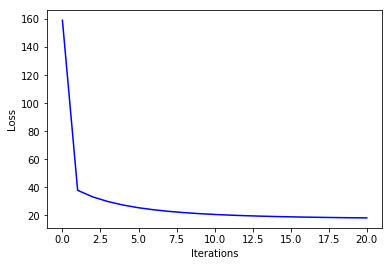

In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt

def als(R_train, R_test, K, alpha, beta, iteration):
    P = np.random.rand(R_train.shape[0], K)
    Q = np.random.rand(K, R_train.shape[1])
    Loss = []
    L = loss(R_test, P, Q, beta)
    Loss.append(L)
    #训练P，Q矩阵
    for i in range(iteration):
        for m in range (R_train.shape[0]):
            for n in range (R_train.shape[1]):
                if R_train[m][n] > 0:
                    eij = R_train[m][n] - np.dot(P[m,:], Q[:,n])
                    for k in range(K):
                        P[m, k] = P[m, k] + alpha * (2 * eij * Q[k, n] - beta * P[m, k])
                        Q[k, n] = Q[k, n] + alpha * (2 * eij * P[m, k] - beta * Q[k, n])
        L = loss(R_test, P, Q, beta)
        Loss.append(L)
    return P, Q, Loss

#损失函数
def loss(R, P, Q, beta):
    L0 = np.sum((R - np.dot(P, Q))**2)
    L1 = beta * (np.sum(P**2) + np.sum(Q**2))
    L = (L0 + L1) / (R.shape[0] * R.shape[1])
    return L

R_train = np.zeros((943, 1682))
R_test = np.zeros((943, 1682))

#读取数据，填充原始评分矩阵
for i in range(1):
    f0 = 'G:\\MLcode\\data\\ml-100k\\u%d.base' %(i+1)
    f1 = 'G:\\MLcode\\data\\ml-100k\\u%d.test' %(i+1)
    X_train = np.loadtxt(f0, usecols=(0,1,2))
    X_test = np.loadtxt(f1, usecols=(0,1,2))
    for j in range(X_train.shape[0]):
        x = int(X_train[j, 0]-1)
        y = int(X_train[j, 1]-1)
        R_train[x, y] = X_train[j, 2]
    for j in range(X_test.shape[0]):
        x = int(X_test[j, 0]-1)
        y = int(X_test[j, 1]-1)
        R_test[x, y] = X_test[j, 2]
        
K = 50
alpha = 0.002
beta = 0.02
iteration = 20
        
P, Q, Loss = als(R_train, R_test, K, alpha, beta, iteration)
        
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(Loss, color = 'blue')
plt.show()